<a href="https://colab.research.google.com/github/imvignesh003/SocialMediaChannalizationML/blob/main/SocialSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [15]:
!kaggle datasets download -d moazeldsokyx/bbc-news

! unzip "bbc-news.zip"

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/bbc-news
License(s): unknown
bbc-news.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bbc-news.zip
replace bbc-text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bbc-text.csv            


In [16]:
df = pd.read_csv('/content/bbc-text.csv')

In [17]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [18]:
categories = df['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [19]:
category_map = {
    'tech': 'productivity',
    'business': 'productivity',
    'politics': 'productivity',
    'entertainment': 'entertainment',
    'sport': 'entertainment'
}
df['label'] = df['category'].map(category_map)

In [20]:
df.drop(columns=['category'], inplace=True)
df.head()

,text,label
0,tv future in the hands of viewers with home th...,productivity
1,worldcom boss left books alone former worldc...,productivity
2,tigers wary of farrell gamble leicester say ...,entertainment
3,yeading face newcastle in fa cup premiership s...,entertainment
4,ocean s twelve raids box office ocean s twelve...,entertainment


In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [22]:
df.head()

,text,label,cleaned_text
0,tv future in the hands of viewers with home th...,productivity,tv future in the hands of viewers with home th...
1,worldcom boss left books alone former worldc...,productivity,worldcom boss left books alone former worldc...
2,tigers wary of farrell gamble leicester say ...,entertainment,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...,entertainment,yeading face newcastle in fa cup premiership s...
4,ocean s twelve raids box office ocean s twelve...,entertainment,ocean s twelve raids box office ocean s twelve...


In [23]:
# Vectorization for KNN & SVM
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label'].map({'productivity': 0, 'entertainment': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train SVM model
svm = SVC(kernel='linear')
train_accuracies = []
test_accuracies = []
iteration_range = range(1, 21)

for i in iteration_range:
    svm.fit(X_train, y_train)
    train_accuracies.append(svm.score(X_train, y_train))
    test_accuracies.append(svm.score(X_test, y_test))


In [26]:
# Make predictions
y_pred = svm.predict(X_test)

In [27]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9775
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       266
           1       1.00      0.94      0.97       179

    accuracy                           0.98       445
   macro avg       0.98      0.97      0.98       445
weighted avg       0.98      0.98      0.98       445

[[266   0]
 [ 10 169]]


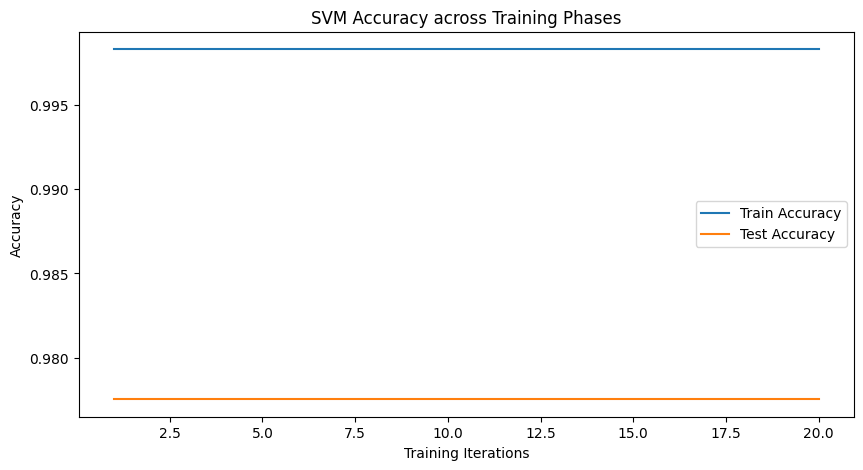

In [28]:
# Visualization of accuracy trends
plt.figure(figsize=(10, 5))
plt.plot(iteration_range, train_accuracies, label='Train Accuracy')
plt.plot(iteration_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy across Training Phases')
plt.legend()
plt.show()

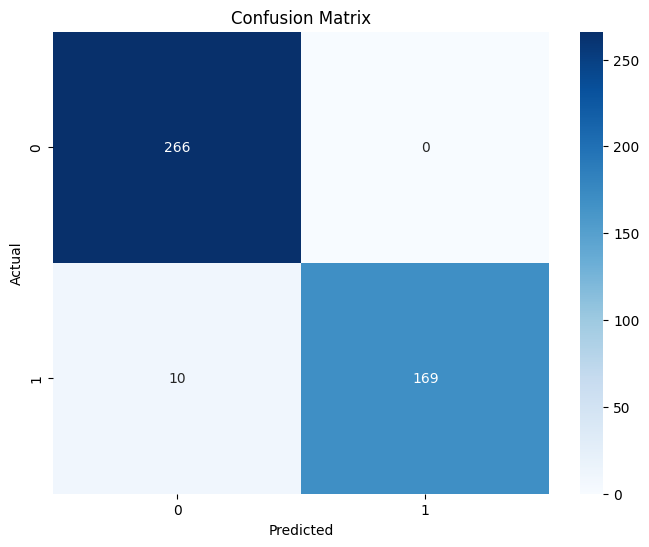

In [29]:
# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

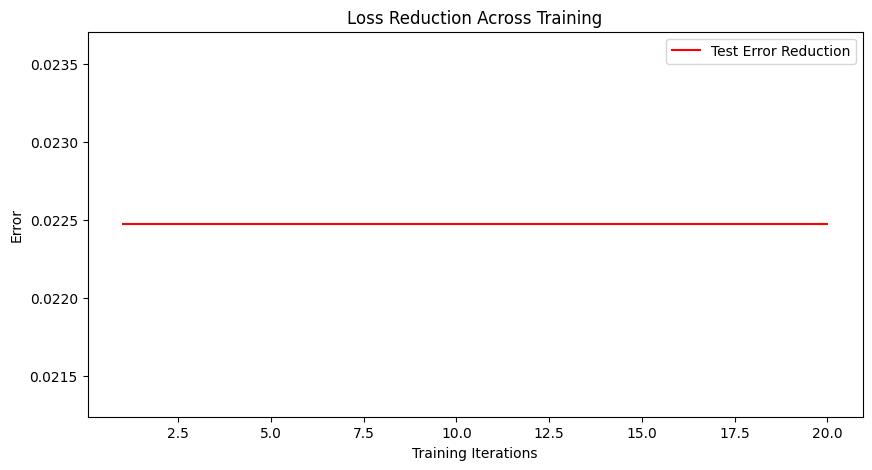

In [30]:
# Loss reduction graph (SVM does not have a direct loss function visualization, but we simulate error reduction)
errors = [1 - acc for acc in test_accuracies]
plt.figure(figsize=(10, 5))
plt.plot(iteration_range, errors, label='Test Error Reduction', color='red')
plt.xlabel('Training Iterations')
plt.ylabel('Error')
plt.title('Loss Reduction Across Training')
plt.legend()
plt.show()